<a href="https://colab.research.google.com/github/Yaseerkhan001/Mobile-Price-Range-Prediction/blob/main/Mobile_price_range_prediction_classification_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sample Data/data_mobile_price_range.csv")

pd.pandas.set_option('display.max_columns',None)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.duplicated().sum()

0

There are no null values and 0 duplicate entries in our dataset & all features are numerical.

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Here we can see that there are some entries in px_height and sc_w which are 0 and that is not possible so we will remove all these wrong data.

In [ ]:
dff = df[df['sc_w'] != 0]
dff.shape

(1820, 21)

In [ ]:
dff.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,9.882418,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143,0.760989,0.507692,0.513187,1.509341
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,6.007821,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951,0.426597,0.500078,0.499963,1.119285
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,10.000000,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,15.000000,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
ddf = dff[dff['px_height'] != 0]
ddf.shape

(1819, 21)

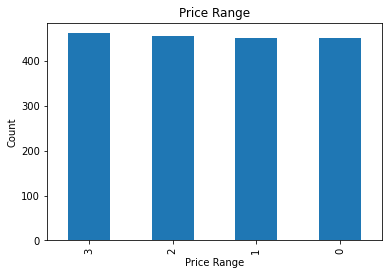

In [ ]:
ddf["price_range"].value_counts().plot(kind = 'bar')
plt.title('Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

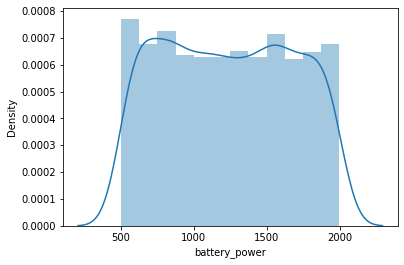

In [ ]:
sns.distplot(ddf['battery_power'])

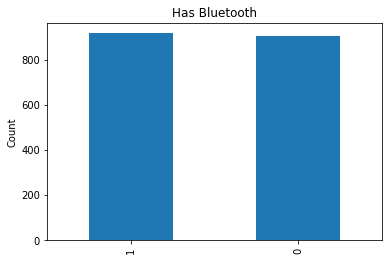

In [ ]:
ddf["blue"].value_counts().plot(kind = 'bar')
plt.title('Has Bluetooth')
plt.ylabel('Count')
plt.show()

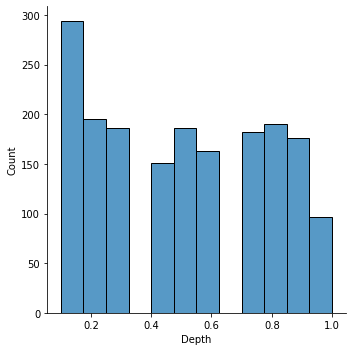

In [ ]:
sns.displot(data=ddf["m_dep"])
plt.xlabel('Depth')
plt.show()

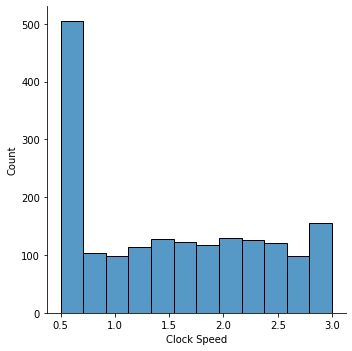

In [ ]:
sns.displot(data=ddf["clock_speed"])
plt.xlabel('Clock Speed')
plt.show()

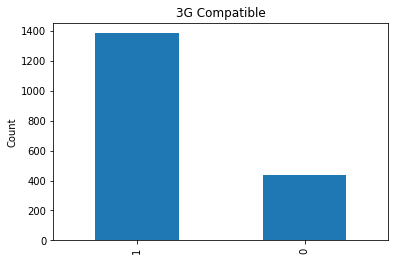

In [ ]:
ddf["three_g"].value_counts().plot(kind = 'bar')
plt.title('3G Compatible')

plt.ylabel('Count')
plt.show()

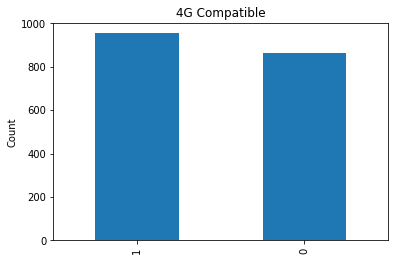

In [ ]:
ddf["four_g"].value_counts().plot(kind = 'bar')
plt.title('4G Compatible')
plt.ylabel('Count')
plt.show()

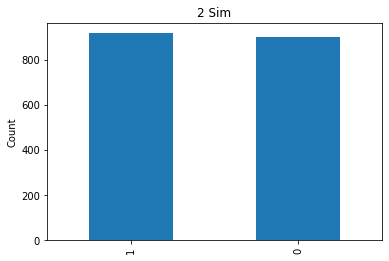

In [ ]:
ddf["dual_sim"].value_counts().plot(kind = 'bar')
plt.title('2 Sim')
plt.ylabel('Count')
plt.show()

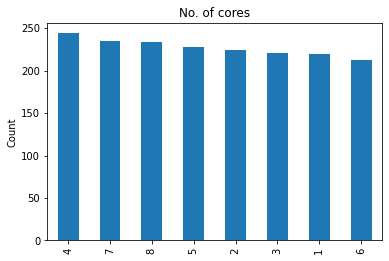

In [ ]:
ddf["n_cores"].value_counts().plot(kind = 'bar')
plt.title('No. of cores')
plt.ylabel('Count')
plt.show()

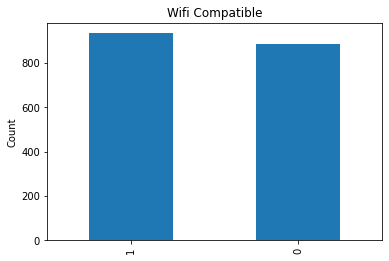

In [ ]:
ddf["wifi"].value_counts().plot(kind = 'bar')
plt.title('Wifi Compatible')
plt.ylabel('Count')
plt.show()

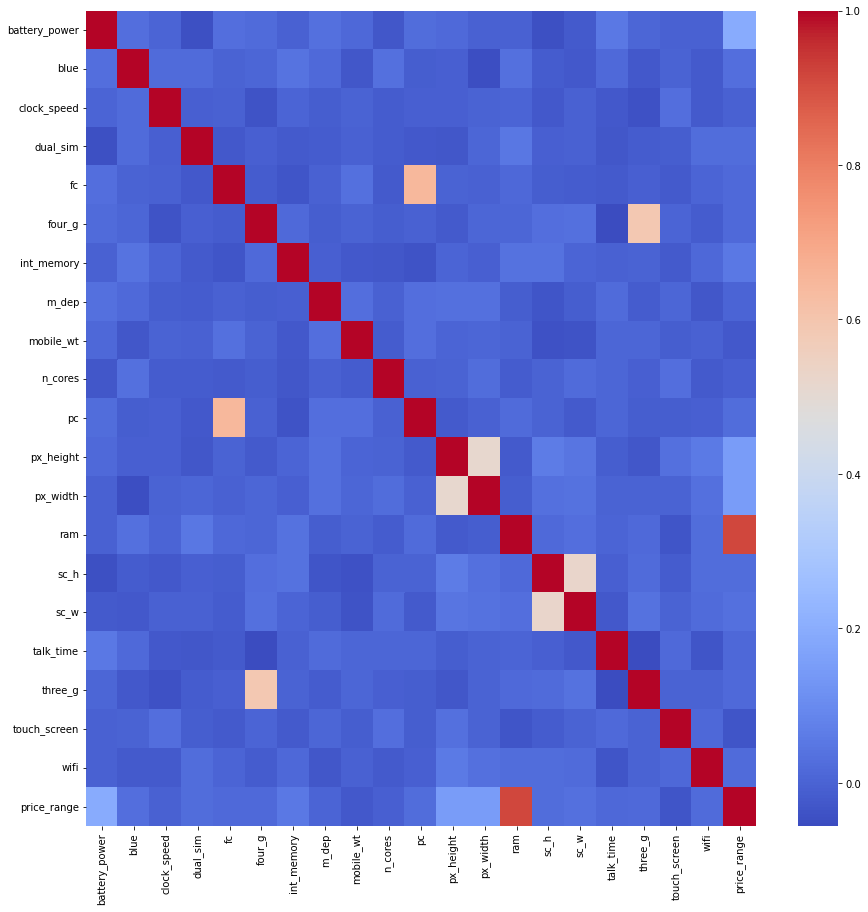

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(ddf.corr(), cmap='coolwarm')

In [ ]:
ddf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X=ddf.drop(['price_range'], axis=1)
y=ddf['price_range']

In [ ]:
#train test split of data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#confusion matrix
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

Random Forest Classifier Accuracy Score:  0.8763736263736264
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.87      0.83      0.85        96
           2       0.83      0.82      0.82        98
           3       0.89      0.92      0.91        90

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364



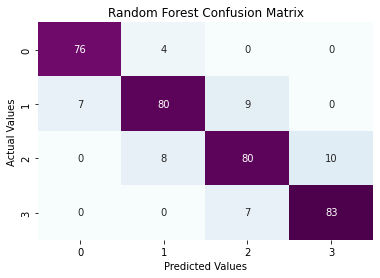

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rf))
cm_rfc=my_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)
y_pred_nb=nb.predict(X_test)

Gaussian Naive Bayes Classifier Accuracy Score:  0.7857142857142857
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        80
           1       0.73      0.72      0.72        96
           2       0.70      0.72      0.71        98
           3       0.85      0.88      0.86        90

    accuracy                           0.79       364
   macro avg       0.79      0.79      0.79       364
weighted avg       0.79      0.79      0.79       364



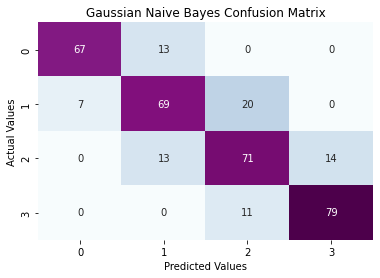

In [ ]:
print('Gaussian Naive Bayes Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_nb))
cm_rfc=my_confusion_matrix(y_test, y_pred_nb, 'Gaussian Naive Bayes Confusion Matrix')

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

KNN Classifier Accuracy Score:  0.9010989010989011
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.90      0.89      0.89        96
           2       0.86      0.87      0.86        98
           3       0.90      0.92      0.91        90

    accuracy                           0.90       364
   macro avg       0.90      0.90      0.90       364
weighted avg       0.90      0.90      0.90       364



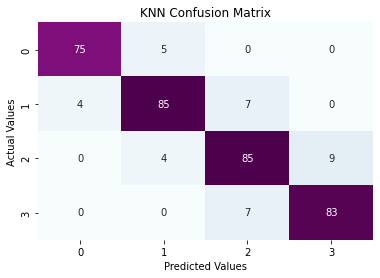

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

In [ ]:
svmc = svm.SVC()

In [ ]:
svmc.fit(X_train, y_train)
y_pred_svm=svmc.predict(X_test)

SVM Classifier Accuracy Score:  0.9395604395604396
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        80
           1       0.94      0.95      0.94        96
           2       0.98      0.85      0.91        98
           3       0.90      0.99      0.94        90

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



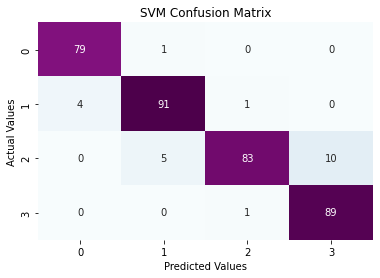

In [ ]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')